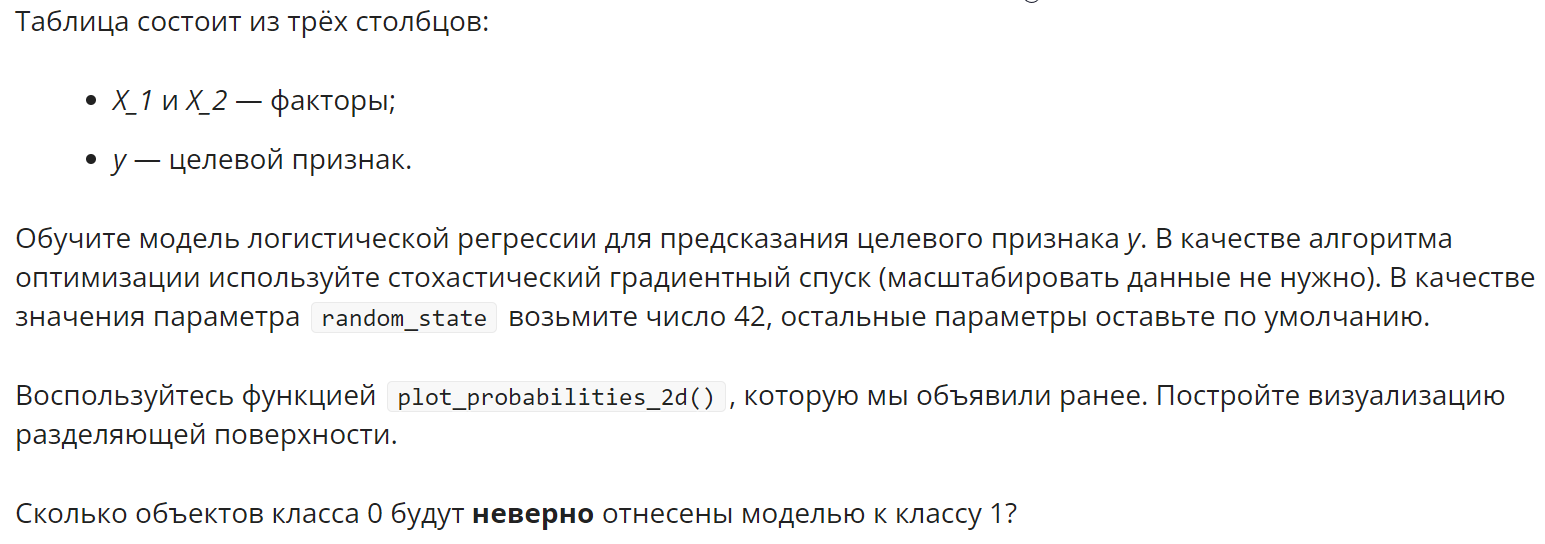

In [6]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)

import Handlers as hd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

%matplotlib inline
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

In [8]:
from sklearn import linear_model

[Данные качать здесь](https://lms.skillfactory.ru/assets/courseware/v1/6a019aae7e83a8a11bb1fdf0788e3e6e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/task_data.zip)

In [9]:
task_data = pd.read_csv('data/task_data.zip', index_col=0)

In [10]:
task_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     100 non-null    float64
 1   X_2     100 non-null    float64
 2   y       100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB


Смотрю что из себя представляет целевой признак, какие там есть значения

In [16]:
task_data['y'].value_counts()

y
1    60
0    40
Name: count, dtype: int64

Нужно сделать приведение типов к целому числу

In [15]:
task_data['y'] = task_data['y'].astype(int)

In [17]:
task_data

,X_1,X_2,y
SNo,,,
0,-0.869144,0.389310,0
1,-0.993467,-0.610591,0
2,-0.834064,0.239236,0
3,-0.136471,0.632003,1
4,0.403887,0.310784,1
...,...,...,...
95,0.531635,-0.479185,1
96,-0.650192,0.655303,1
97,0.985299,0.118333,1


In [18]:
X = task_data.drop(columns='y')
y = task_data['y']

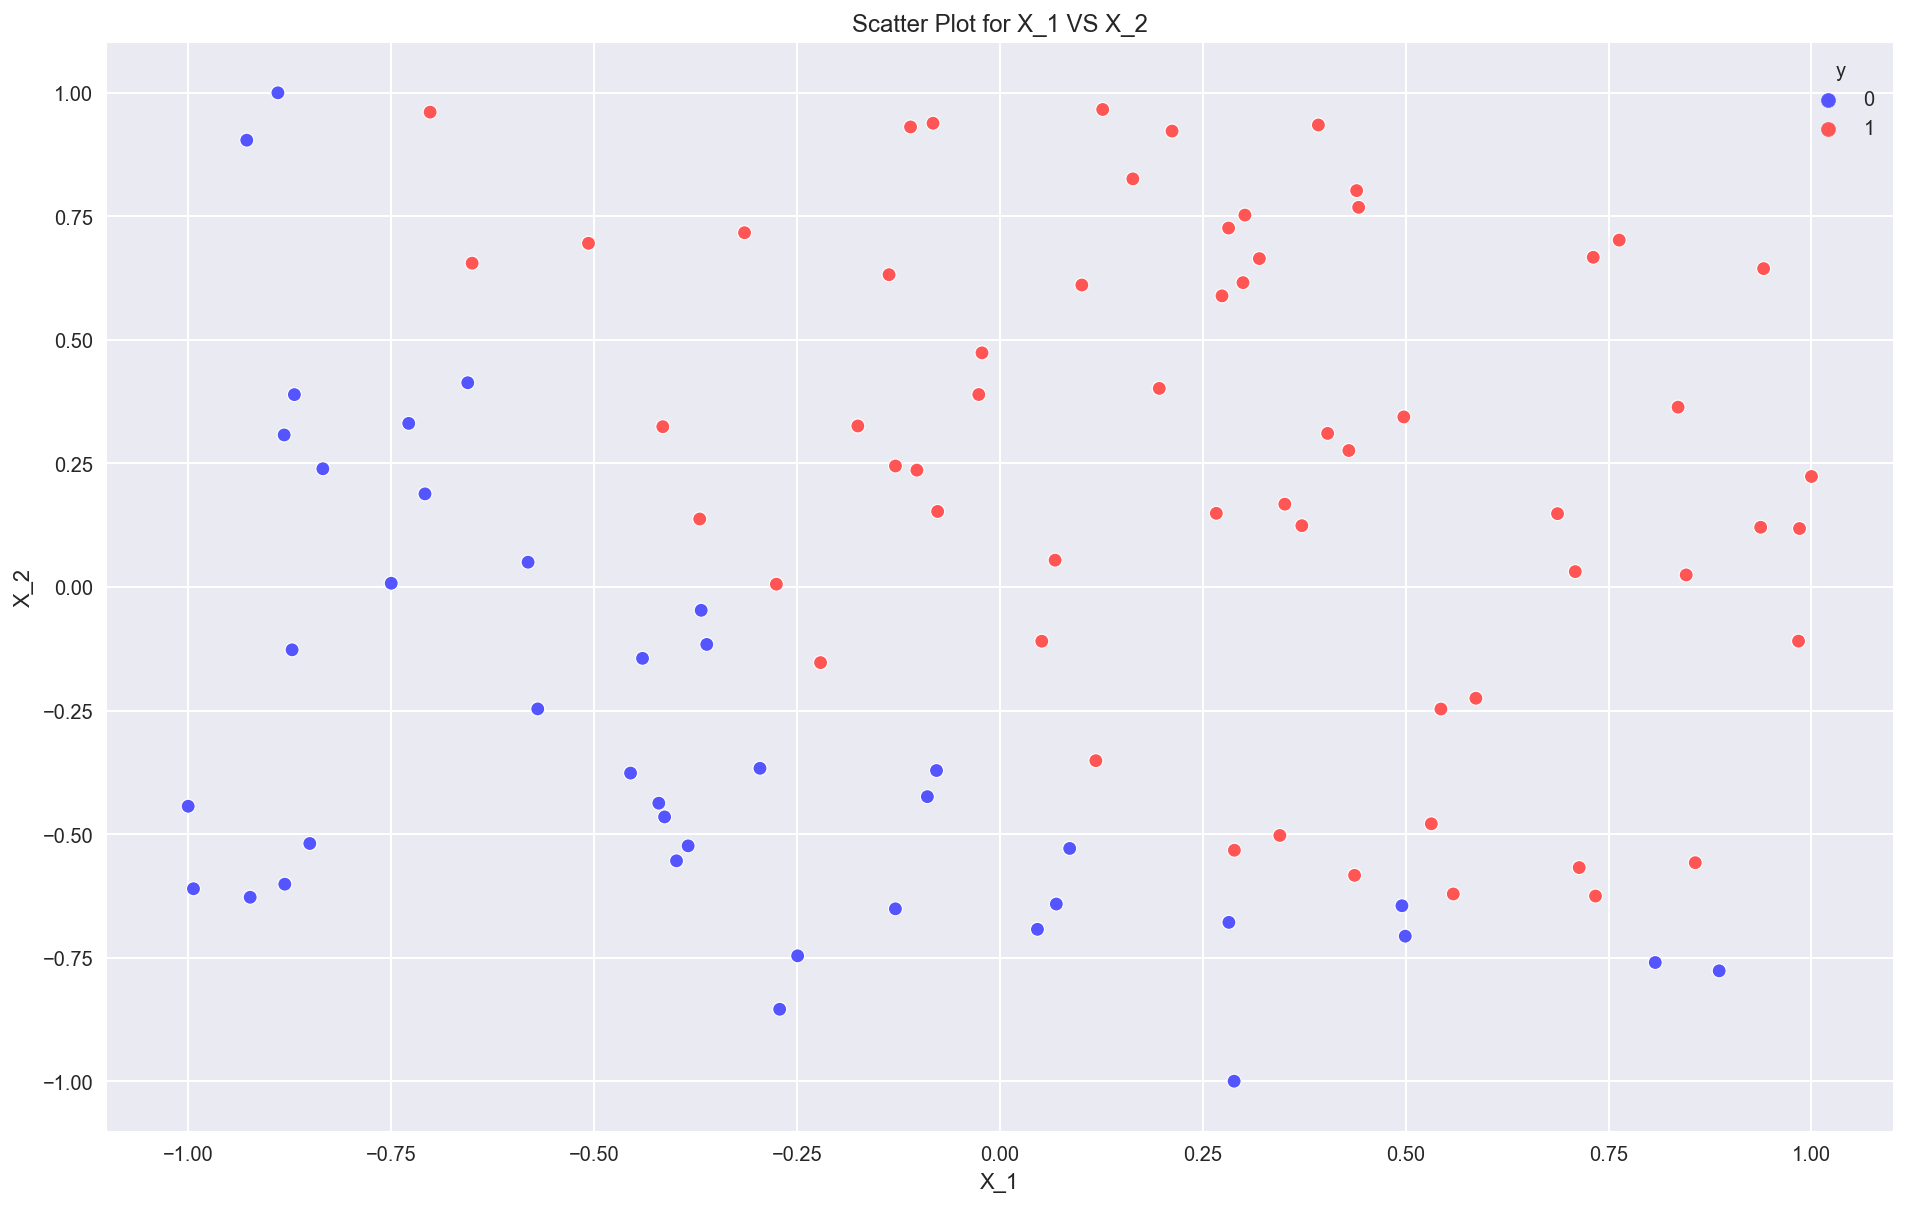

In [19]:
fig, ax = plt.subplots(figsize = (16, 10)) # фигура + координатная плоскость
# Строим диаграмму рассеяния
sns.scatterplot(
    data=task_data, # датасет
    x='X_1', # ось абсцисс
    y='X_2', # ось ординат
    hue='y', # группировка
    palette='seismic', # палитра
    ax=ax, # координатная плоскость
)
# Задаем название графику
ax.set_title('Scatter Plot for X_1 VS X_2');

In [20]:
# Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42, solver='sag')

# Обучаем модель, минизируя logloss
log_reg_2d.fit(X, y)

# Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) # свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) # остальные параметры модели w1, w2, ..., wm

w0: [0.55556317]
w1, w2: [[2.80981798 2.58767105]]


In [21]:
# Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    # Генерируем координатную сетку из всех возможных значений для признаков
    # Glucose изменяется от x1_min = 44 до x2_max = 199, 
    # BMI - от x2_min = 18.2 до x2_max = 67.1
    # Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    
    # Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    # Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    
    # Предсказывает вероятность для всех точек на координатной сетке
    # Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    
    # Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    
    # Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (16, 10))
    
    # Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    
    # Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
    
    # Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    
    # Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    
    # Даем графику название
    ax.set_title('Scatter Plot with Decision Boundary')
    
    # Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
    plt.show()

C:\Users\avvoy\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\avvoy\AppData\Local\Temp\ipykernel_14224\2800443715.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = fig.colorbar(contour)


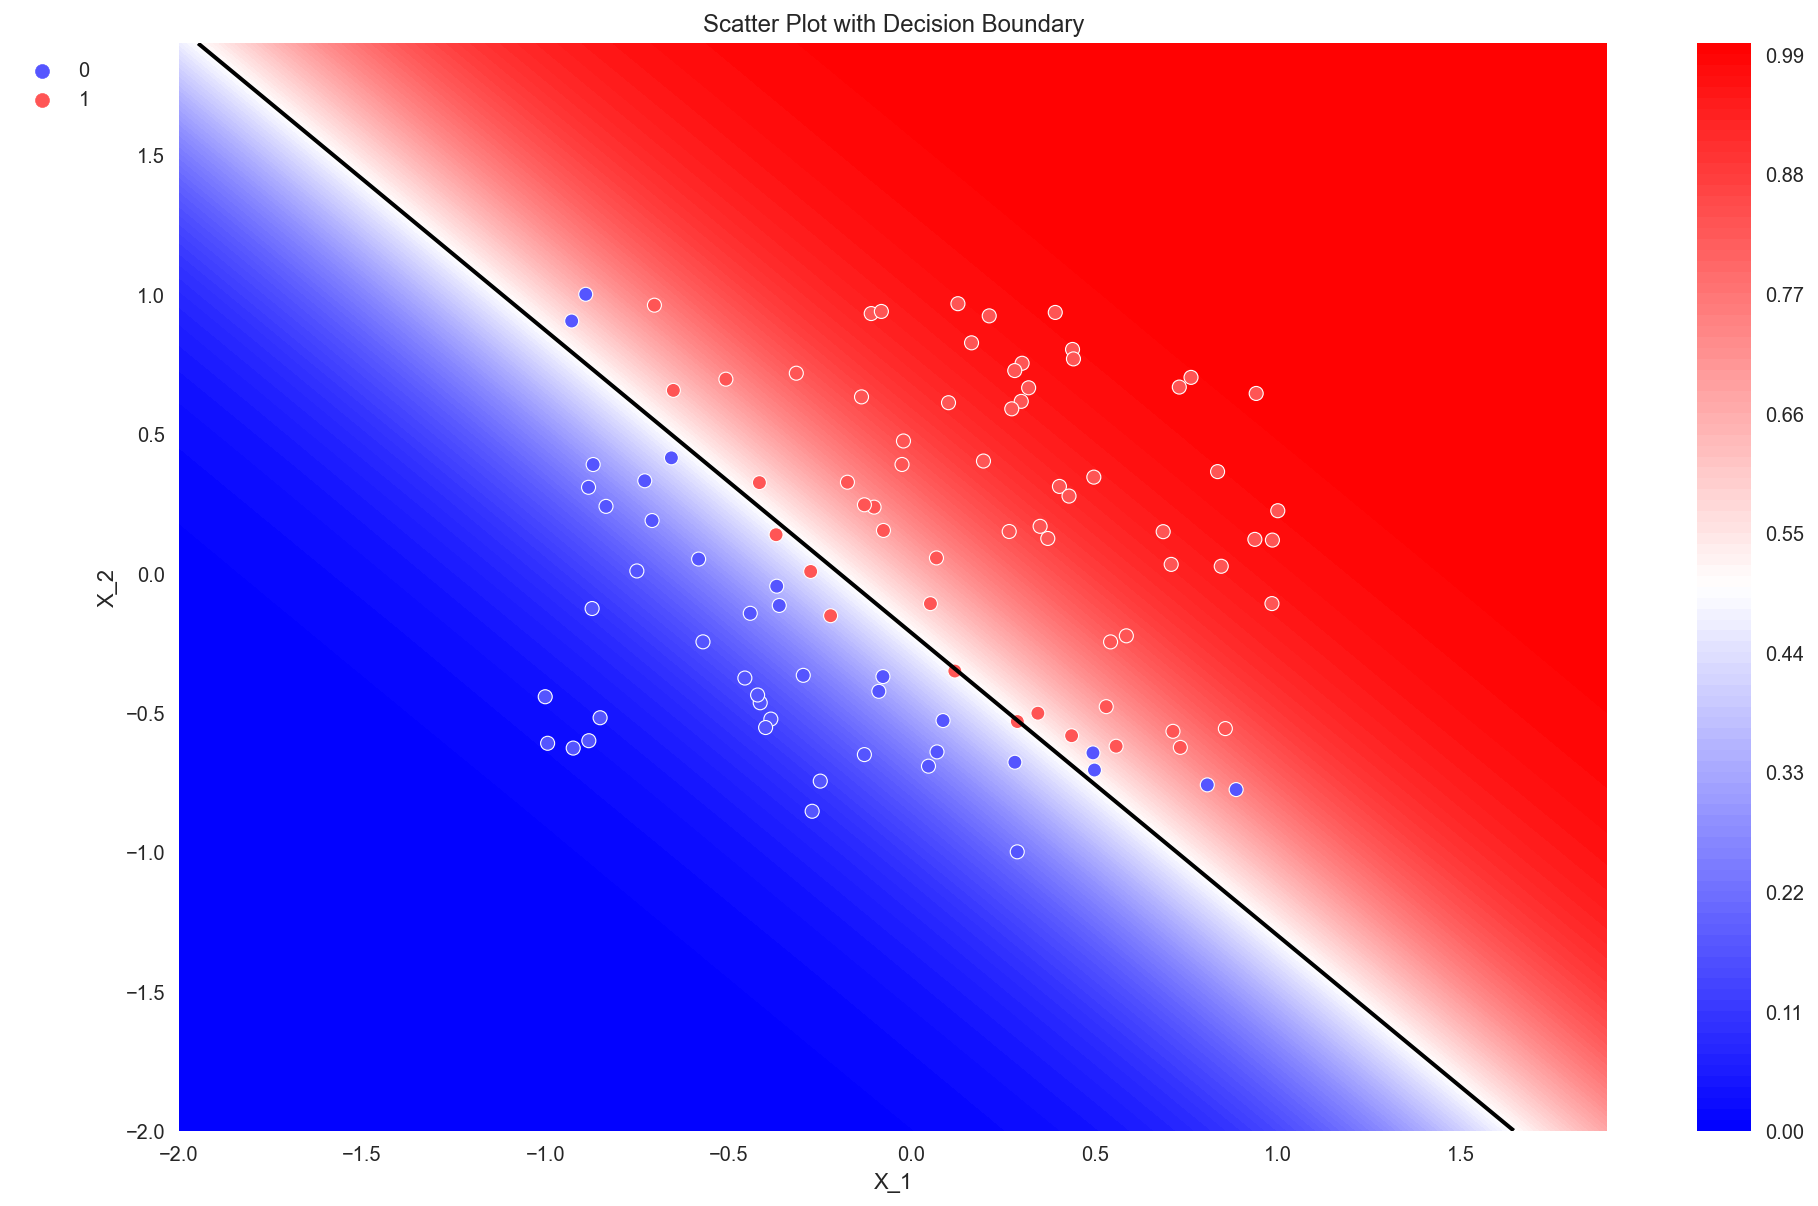

In [22]:
plot_probabilities_2d(X, y, log_reg_2d)

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

In [13]:
6

6